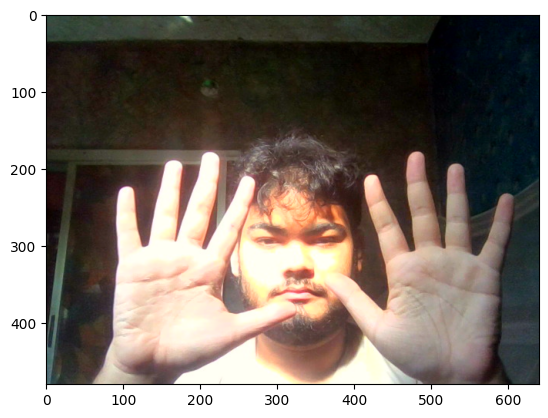

In [16]:
import matplotlib.pyplot as plt
import cv2

cap = cv2.VideoCapture(0)

success,img = cap.read()
cap.release()

img_flip = cv2.flip(img, 1)
img_rgb = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [17]:
import mediapipe as mp

mp_hands = mp.solutions.hands
    # shortcut for hands module
    # provides everything needed for hand detection and landmark tracking

hand_model = mp_hands.Hands(
    # creating Hands object  
    # loads hand detection + hand landmark model

    static_image_mode=False,
    max_num_hands=2,
    model_complexity=1,
        # (0-2), higher, accurate, slower
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

mp_draw = mp.solutions.drawing_utils
    # loads drawing utilies module

results = hand_model.process(img_rgb)
    # returns a Results object containing:
        # results.multi_hand_landmarks
            # list of 21 landmarks per hand
        # results.multi_handedness 
            # left/right hand classification
        # results.multi_hand_world_landmarks 
            # optional 3D landmarks

In [18]:
results.multi_hand_landmarks
    # returns a list of hands
    # results[0] = 1st detected hand landmarks

hand1_lms = results.multi_hand_landmarks[0]
    # contains object like thing containing 21 landmarks for hand1

hand1_lms_iterable = hand1_lms.landmark
    # returns the landmark points of 1st hand 
    # in a list like iterable object of length 21
"""
[x: 0.255960435
y: 0.873713732
z: 5.01125e-007,
x: 0.315093398
y: 0.866291165
z: -0.02837063,
...
x: 0.19124566
y: 0.5568434
z: -0.0475808047
]
"""

hand1_lms_iterable[0].x
    # 0.2559604346752167
hand1_lms_iterable[0].y
    # 0.8737137317657471
hand1_lms_iterable[0].z
    # 5.011249868402956e-07

5.214813540987961e-07

In [19]:
for hand_lms in results.multi_hand_landmarks:
    print(f'new hand')
    for id, lm in enumerate(hand_lms.landmark):
        # lm.x → normalized x coordinate (0..1)
        # lm.y → normalized y coordinate (0..1)
        # lm.z → depth-like value, relative to wrist
        print(id)
        print(lm.x)
        print(lm.y)
        print(lm.z)

new hand
0
0.20990225672721863
0.9368119239807129
5.214813540987961e-07
1
0.29534974694252014
0.917671799659729
-0.033536311239004135
2
0.3798692226409912
0.8565185070037842
-0.046178802847862244
3
0.4485020339488983
0.8159276843070984
-0.05716078728437424
4
0.5002128481864929
0.7967446446418762
-0.06823345273733139
5
0.33417198061943054
0.6814939975738525
-0.023093225434422493
6
0.3712840676307678
0.5751506090164185
-0.041317809373140335
7
0.39123666286468506
0.5121108889579773
-0.05874256044626236
8
0.40509992837905884
0.45747190713882446
-0.07260967046022415
9
0.28573504090309143
0.6558796763420105
-0.024714604020118713
10
0.31199151277542114
0.5327408909797668
-0.03950808197259903
11
0.32738447189331055
0.4589065909385681
-0.05737420171499252
12
0.33534225821495056
0.40014779567718506
-0.07156596332788467
13
0.23543807864189148
0.6555199027061462
-0.030828462913632393
14
0.24568919837474823
0.5398386716842651
-0.046666570007801056
15
0.2539891004562378
0.47116416692733765
-0.062860

In [24]:
print(results.multi_handedness)

[classification {
  index: 0
  score: 0.987538517
  label: "Left"
}
, classification {
  index: 1
  score: 0.9543522
  label: "Right"
}
]


In [31]:
hand_info = results.multi_handedness[0]
hand_info.classification[0].label

'Left'

In [26]:
h,w,c = img.shape
pixel_x = int(lm.x*w)
pixel_y = int(lm.y*h)

print(pixel_x)
print(pixel_y)

597
243


In [14]:
mp_hands.HAND_CONNECTIONS
    # connections to made between id pairs

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

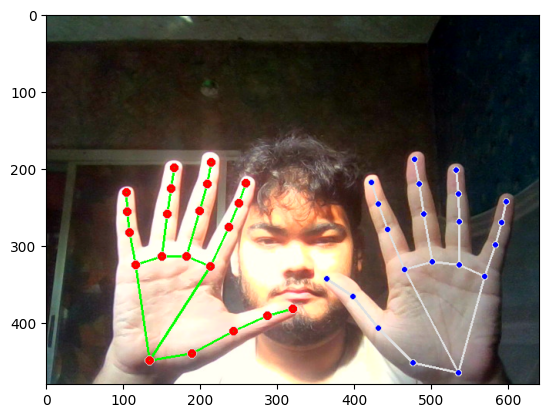

In [ ]:
hand1_lms = results.multi_hand_landmarks[0]
hand2_lms = results.multi_hand_landmarks[1]

mp_draw.draw_landmarks(img_rgb, 
                       hand1_lms, 
                       mp_hands.HAND_CONNECTIONS,
                       mp_draw.DrawingSpec(color=(255,0,0), thickness=4, circle_radius=3),
                       mp_draw.DrawingSpec(color=(0,255,0), thickness=2)
                    )
mp_draw.draw_landmarks(img_rgb, 
                       hand2_lms, 
                       mp_hands.HAND_CONNECTIONS)

plt.imshow(img_rgb)


In [ ]:
# entire process of landmark showing on hands in live

import cv2
import mediapipe as mp

cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils

hand_model = mp_hands.Hands(
    static_image_mode = False,
    max_num_hands = 1,
    model_complexity = 0,
    min_detection_confidence = 0.5,
    min_tracking_confidence = 0.5
)

while cap.isOpened():

    success, img = cap.read()

    img = cv2.flip(img, 1)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # OpenCV loads BGR, Mediapipe expects RGB

    results = hand_model.process(img_rgb)

    if results.multi_hand_landmarks:
        for hand_lms in results.multi_hand_landmarks:
            mp_draw.draw_landmarks(
                img,
                hand_lms,
                mp_hands.HAND_CONNECTIONS,
                mp_draw.DrawingSpec(
                    color=(255,0,0),
                    thickness=4,
                    circle_radius=3
                ),
                mp_draw.DrawingSpec(
                    color=(0,255,0),
                    thickness=4
                )
            )
    cv2.imshow("frame",img)
    
    if cv2.waitKey(int(5)) == 27:
        break

cap.release()
cv2.destroyAllWindows()

e:\projects\hand_track_num_detect\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
